In [1]:
# Package tictoc has functions to time function calls
#install.packages( "tictoc" )
library(tictoc)

In [2]:
# tic()
# install.packages( 'mice' )
# install.packages( "skimr" )
# install.packages( "GGally" )
# install.packages( "performance")
# install.packages( 'magrittr' )
# toc()

In [3]:
# Metapackage "tidyverse" imports libraries 
# for data manipulation (dplyr) and plotting (ggplot2)
library( tidyverse )

# Package "skimr" has excellent descriptive statistics
# function skim_to_wide()
library( skimr )

# Package "GGally" has ggplot2-style scatterplot matrices
library( GGally )

# Package "ggfortify" has ggplot2-style regression diagnostic plots
#install.packages( 'ggfortify' )
library( ggfortify )

# Package magrittr allows for use of double-ended pipe %<>%
library( magrittr )

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




# Load data

In [4]:
data <- read_csv( 'IMT.csv' )

Rows: 6937 Columns: 6

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): vasIMT, Sex, Age, Education, exmBMI, hxSmoke


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [5]:
data$Education[ data$Education < 2 ] <- 2

In [6]:
data$Education %>% table

.
   2    3    4    5 
1655 3052 1817  413 

In [7]:
data %<>%
    mutate(
        #logIMT = log( vasIMT ),
        Sex = factor(
            Sex,
            levels = c(0,1),
            labels = c( "Women", "Men" )
        ),
        Education = factor(
            Education,
            levels = c( 2, 3, 4, 5 ),
            labels = c( "5th grade", "8th grade", "High school", "University degree" )#,
            #ordered = TRUE
        ),
        hxSmoke = factor(
            hxSmoke,
            levels = c( 0, 1 ),
            labels = c( "NO", "YES" )
        )
    )

# Exploratory: univariate

* Distribution of Penetration is right skew and non-negative; not a count, but more like a rate

In [8]:
dim( data )

[1] 6937    6

In [9]:
data  %<>%
    filter( exmBMI > 0 )

In [10]:
dim( data )

[1] 6935    6

In [11]:
# A notebook-specific directive (not for RStudio)
# Sets the maximum number of rows to something above what is needed
# to show everything:
# options( repr.matrix.max.rows=300 )
# Set the width of the text ourput to 150 characters wide:
options( width=150 )
tic()
skim( data )
toc()

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             6935  
Number of columns          6     
_______________________          
Column type frequency:           
  factor                   3     
  numeric                  3     
________________________         
Group variables            None  

── Variable type: factor ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts                               
1 Sex                   0             1 FALSE          2 Wom: 3957, Men: 2978                     
2 Education             0             1 FALSE          4 8th: 3050, Hig: 1817, 5th: 1655, Uni: 413
3 hxSmoke               0             1 FALSE          2 NO: 5496, YES: 1439                      

── Variable type: numeric ────────────────────────────────────────────

# Scatterplot matrix of raw data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



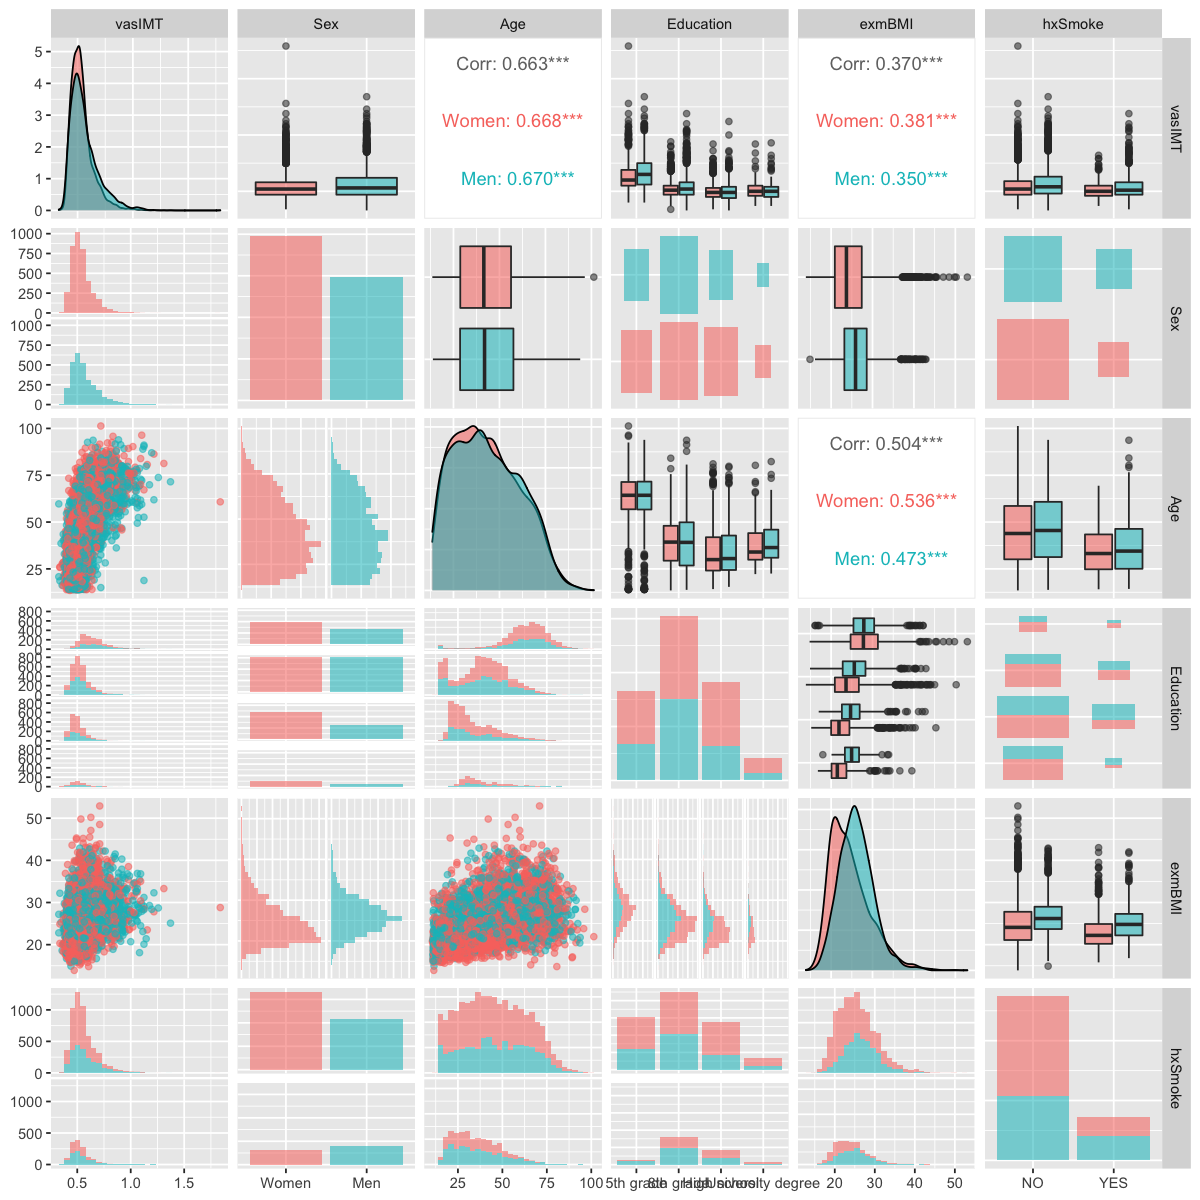

In [12]:
options( repr.plot.width=10, repr.plot.height=10 )
data %>%
    ggpairs( aes( color=Sex, alpha=0.5 ) )

# Scatterplot matrix of various dependent variable transforms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



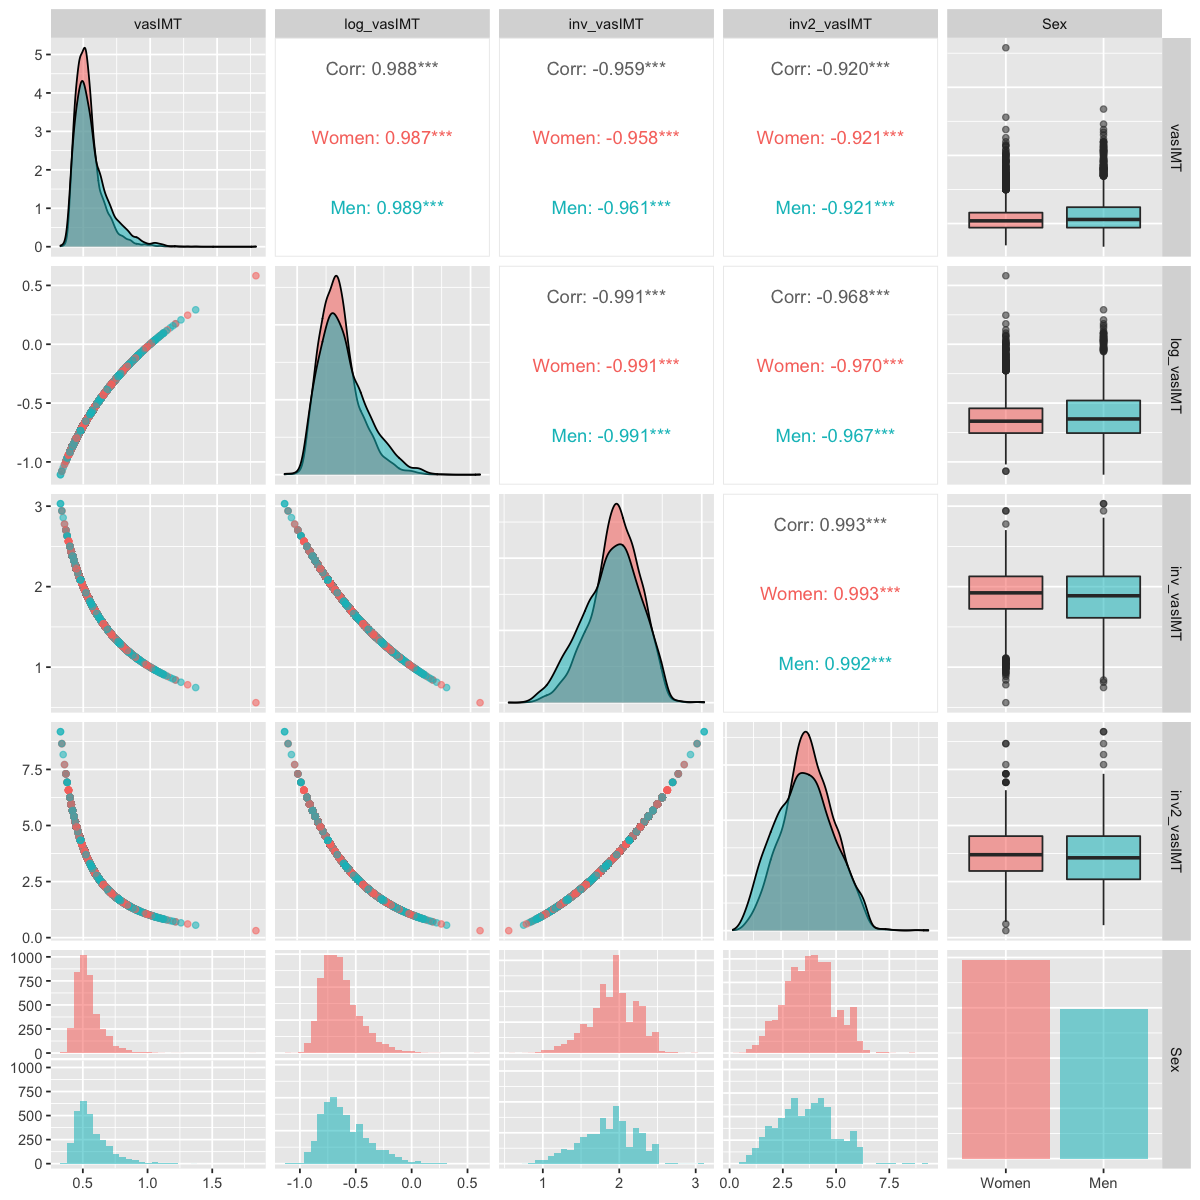

In [13]:
data %>%
    mutate(
        log_vasIMT = log( vasIMT ),
        inv_vasIMT = 1 / vasIMT,
        inv2_vasIMT = 1 / (vasIMT)**2
    ) %>%
    select( vasIMT, log_vasIMT, inv_vasIMT, inv2_vasIMT, Sex ) %>%
    ggpairs( aes( color=Sex, alpha=0.5 ) )

# Optional: impute missing data

* Set the random seed for imputation for reproducability!
* Many methods for imputation available, e.g., mixed effect, random forest, etc. 

In [14]:
data %>% is.na %>% sum 

[1] 0

In [15]:
# library( mice )

# tic()
# imputation_model <- mice( data, method='cart', m=1, maxit=1 )
# toc()

#glimpse( imputation_model )

#imputed_data <- mice::complete( imputation_model )

#imputed_data %>% is.na %>% sum

# Model 1: Try LM of raw (untransformed) dependent variable

* Model achieves R-squared of 0.46

In [16]:
lm_model1 <- lm( vasIMT ~ . , data )

In [17]:
summary( lm_model1 )


Call:
lm(formula = vasIMT ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28930 -0.05153 -0.00791  0.03919  1.15951 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 3.852e-01  7.355e-03  52.373  < 2e-16 ***
SexMen                      2.150e-02  2.128e-03  10.102  < 2e-16 ***
Age                         3.811e-03  8.119e-05  46.937  < 2e-16 ***
Education8th grade         -2.773e-02  3.160e-03  -8.776  < 2e-16 ***
EducationHigh school       -3.714e-02  3.603e-03 -10.310  < 2e-16 ***
EducationUniversity degree -4.307e-02  5.036e-03  -8.553  < 2e-16 ***
exmBMI                      4.721e-04  2.570e-04   1.837 0.066272 .  
hxSmokeYES                  8.782e-03  2.611e-03   3.363 0.000776 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08493 on 6927 degrees of freedom
Multiple R-squared:  0.4604,	Adjusted R-squared:  0.4598 
F-statistic: 844.3 o

In [18]:
performance::check_collinearity( lm_model1 )

,Term,VIF,SE_factor
,<chr>,<dbl>,<dbl>
1,Sex,1.066728,1.032825
2,Age,1.974924,1.405320
3,Education,1.713322,1.308939
4,exmBMI,1.402335,1.184202
5,hxSmoke,1.078139,1.038335


In [19]:
lm_model1_Ypred <- predict( lm_model1 )

In [20]:
head( lm_model1_Ypred )

1         2         3         4         5         6 
0.4679056 0.6342354 0.5086944 0.5023879 0.4699281 0.4516533

## Model 1 diagnostics

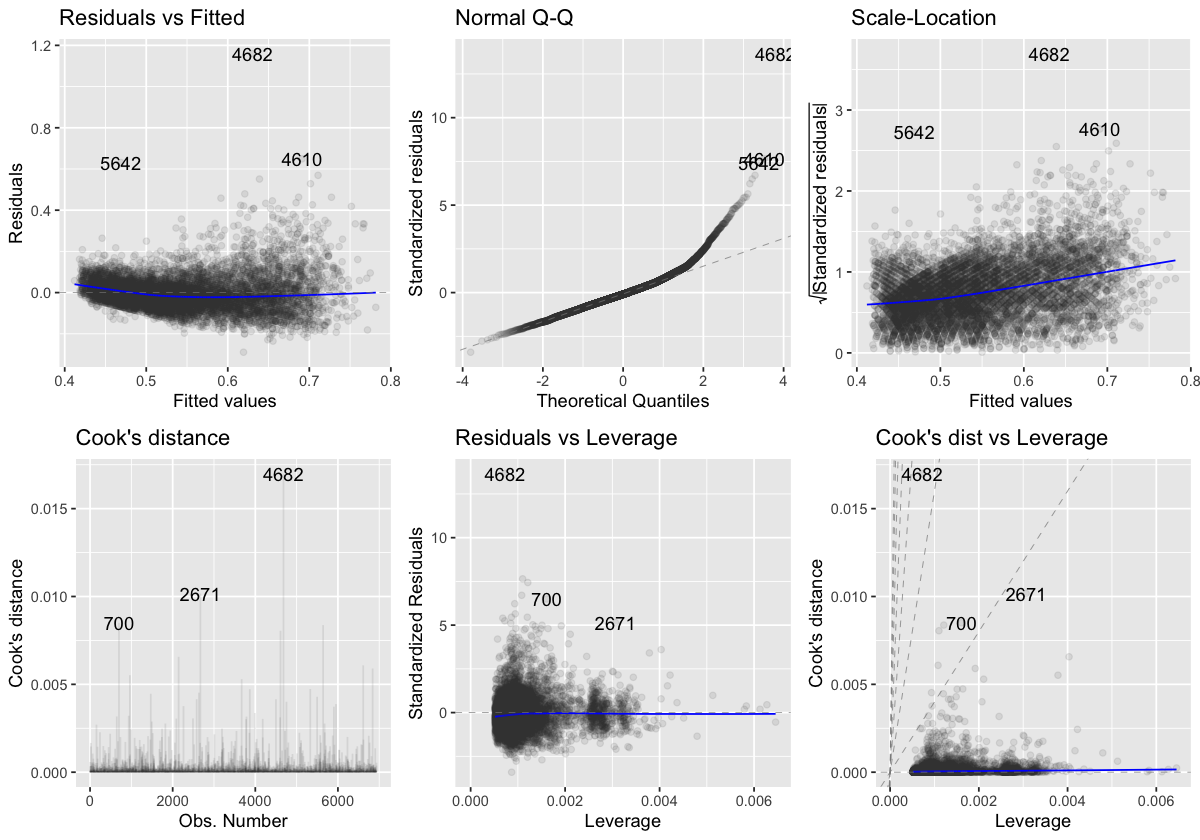

In [21]:
options( repr.plot.width=10, repr.plot.height=7 )
autoplot( lm_model1, which = 1:6, ncol=3, alpha=0.1 )

# Model 2: Try LM using log transformed

In [22]:
lm_model2 <- data %>%
    mutate( log_vasIMT = log( vasIMT ) ) %>%
    select( -vasIMT ) %>%
    lm( log_vasIMT ~ . , data=. )

In [23]:
summary( lm_model2 )


Call:
lm(formula = log_vasIMT ~ ., data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60999 -0.09004 -0.00757  0.07769  1.06366 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -0.9069856  0.0117524 -77.174  < 2e-16 ***
SexMen                      0.0313894  0.0034004   9.231  < 2e-16 ***
Age                         0.0065143  0.0001297  50.214  < 2e-16 ***
Education8th grade         -0.0398198  0.0050494  -7.886 3.60e-15 ***
EducationHigh school       -0.0596955  0.0057566 -10.370  < 2e-16 ***
EducationUniversity degree -0.0675552  0.0080478  -8.394  < 2e-16 ***
exmBMI                      0.0010234  0.0004107   2.492   0.0127 *  
hxSmokeYES                  0.0164337  0.0041729   3.938 8.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1357 on 6927 degrees of freedom
Multiple R-squared:  0.4884,	Adjusted R-squared:  0.4878 
F-statistic: 944.6 o

In [24]:
performance::check_collinearity( lm_model2 )

,Term,VIF,SE_factor
,<chr>,<dbl>,<dbl>
1,Sex,1.066728,1.032825
2,Age,1.974924,1.405320
3,Education,1.713322,1.308939
4,exmBMI,1.402335,1.184202
5,hxSmoke,1.078139,1.038335


In [25]:
# Note the exponentiation to undo the log transform
lm_model2_Ypred <- exp( predict( lm_model2 ) )

In [26]:
head( lm_model2_Ypred )

1         2         3         4         5         6 
0.4667804 0.6238205 0.5018595 0.4952509 0.4711449 0.4562589

In [27]:
# Models not nested so can't compare using F-test
# Nice to see other measures of fit here, though:
performance::compare_performance( lm_model1, lm_model2 )

Warning message:
“When comparing models, please note that probably not all models were fit from same data.”


Name,Model,AIC,AIC_wt,BIC,BIC_wt,R2,R2_adjusted,RMSE,Sigma
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lm_model1,lm,-14511.231,1,-14449.632,1,0.4603873,0.4598420,0.08488416,0.08493316
lm_model2,lm,-8010.371,0,-7948.772,0,0.4883665,0.4878495,0.13563763,0.13571593


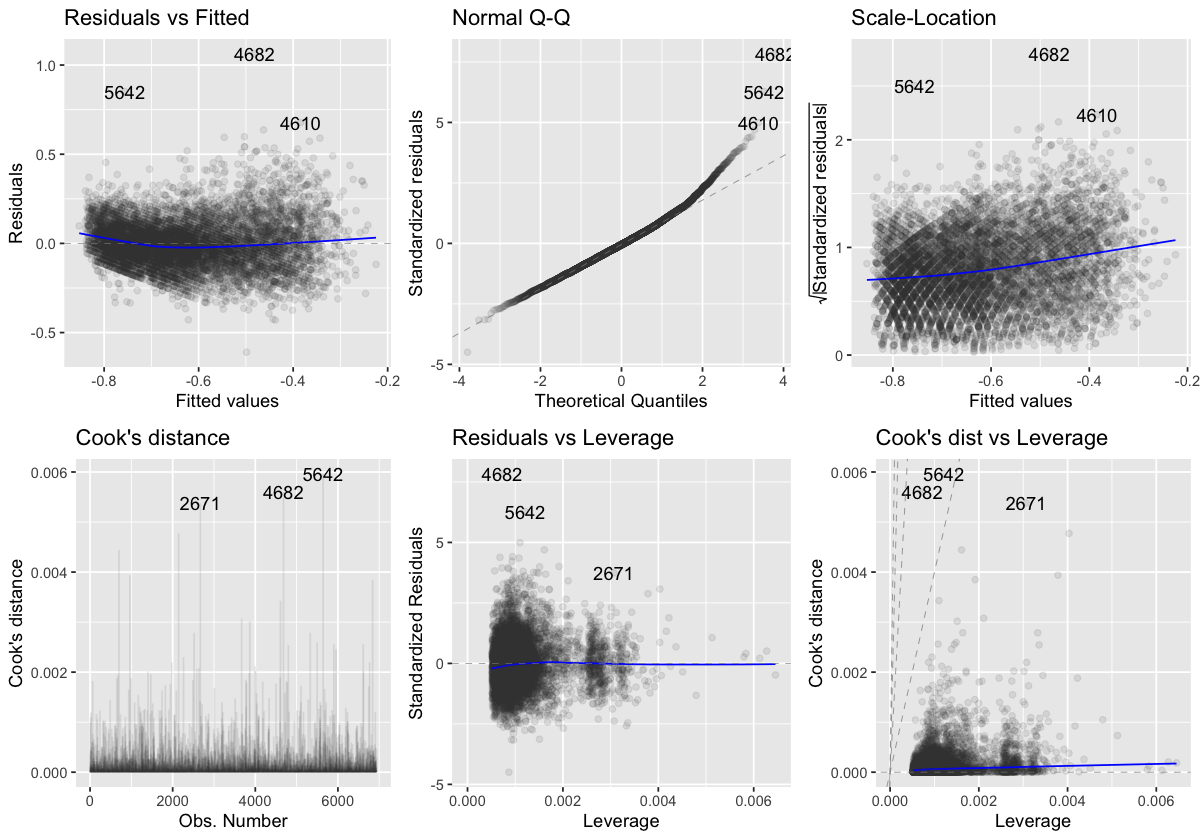

In [28]:
options( repr.plot.width=10, repr.plot.height=7 )
autoplot( lm_model2, which = 1:6, ncol=3, alpha=0.1 )

In [29]:
# Read family page for lots of useful info
# ?family

In [30]:
gamma_family_object = Gamma()

In [31]:
gamma_family_object$link

[1] "inverse"

In [32]:
gamma_family_object$mu

function (eta) 
-1/(eta^2)
<environment: namespace:stats>

In [33]:
InvGaussian_family_object = inverse.gaussian()

In [34]:
InvGaussian_family_object$link

[1] "1/mu^2"

In [35]:
InvGaussian_family_object$mu

function (eta) 
-1/(2 * eta^1.5)
<environment: namespace:stats>

In [36]:
glm_model1 <- glm( vasIMT ~ . , data=data, family=gaussian() )

In [37]:
glm_model2 <- glm( vasIMT ~ . , data=data, family=Gamma() )

In [38]:
glm_model3 <- glm( vasIMT ~ . , data=data, family=inverse.gaussian() )

In [39]:
glm_model4 <- glm( vasIMT ~ . , data=data, family=inverse.gaussian( link='log' ) )

In [40]:
performance::compare_performance( glm_model1, glm_model2, glm_model3, glm_model4 )

Name,Model,AIC,AIC_wt,BIC,BIC_wt,RMSE,Sigma,R2,R2_Nagelkerke
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
glm_model1,glm,-14511.23,0.000000e+00,-14449.63,0.000000e+00,0.08488416,0.08493316,0.4603873,NA
glm_model2,glm,-16520.56,1.608053e-124,-16458.96,1.608053e-124,0.08326377,0.13628337,NA,0.5197036
glm_model3,glm,-17090.65,1.000000e+00,-17029.05,1.000000e+00,0.08316803,0.17854184,0.4819857,NA
glm_model4,glm,-16902.05,1.110914e-41,-16840.45,1.110914e-41,0.08412888,0.18098620,0.4699472,NA


# Best model seems to be inverse gaussian family

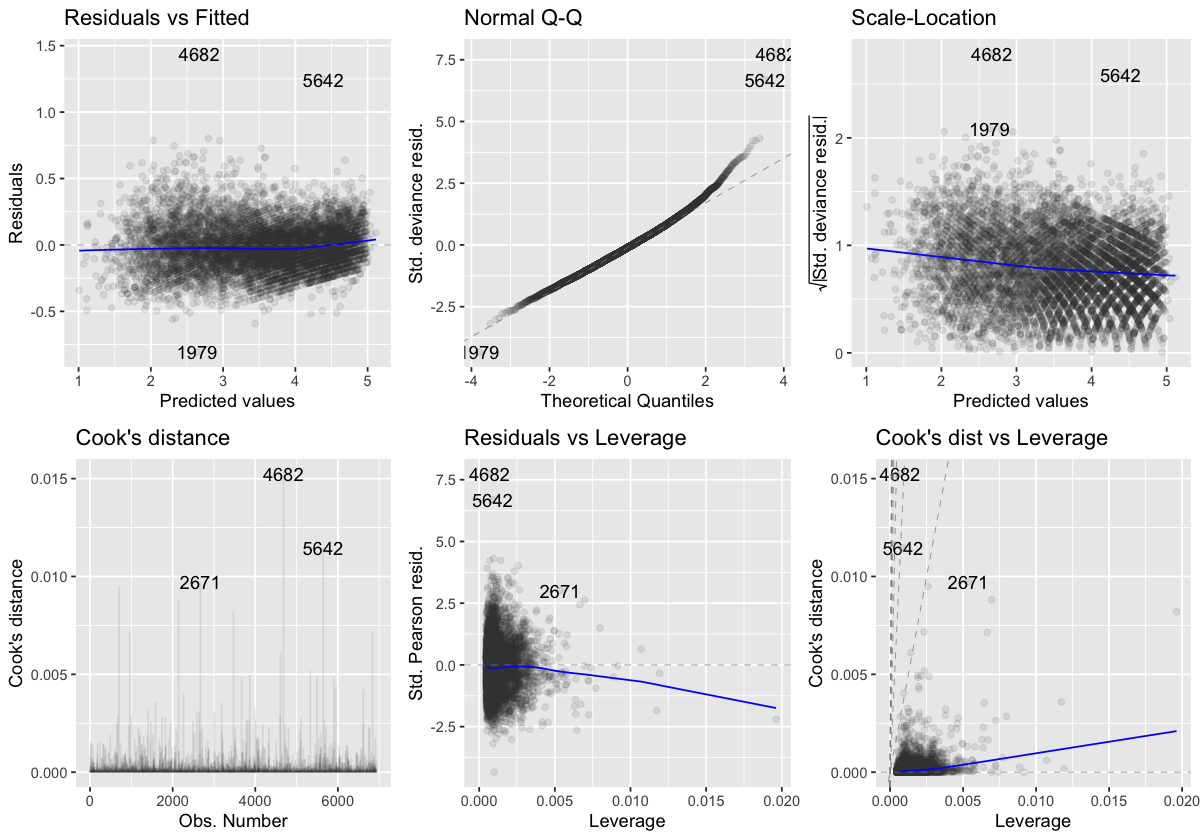

In [41]:
options( repr.plot.width=10, repr.plot.height=7 )
autoplot( glm_model3, which = 1:6, ncol=3, alpha=0.1 )

In [42]:
# Note the exponentiation to undo the log transform
glm_model3_Ypred <- predict( glm_model3, type='response')
# Could also just 1 / sqrt( glm_model3_Ypred )

In [43]:
head( glm_model3_Ypred )

1         2         3         4         5         6 
0.4733716 0.6437337 0.5051612 0.4965249 0.4757610 0.4629496

# Compare predictions

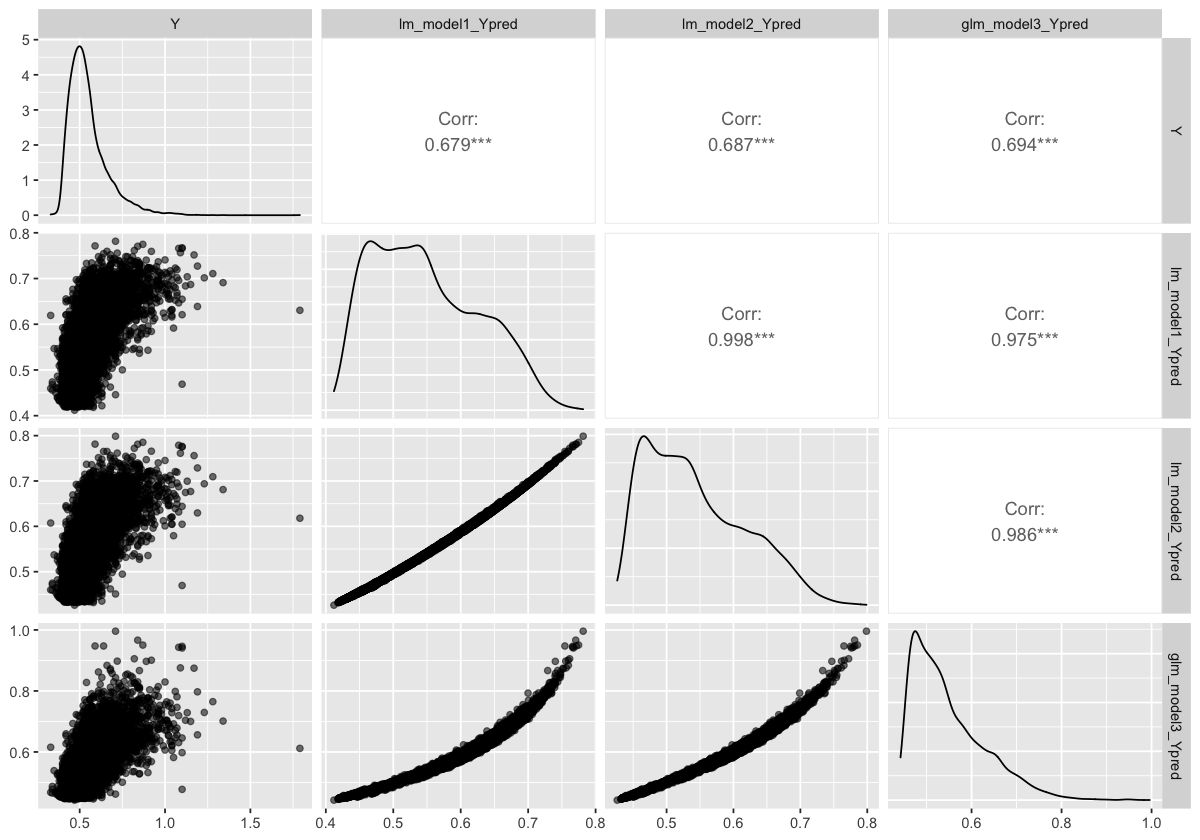

In [44]:
tibble( 
    Y = data$vasIMT,
    lm_model1_Ypred,
    lm_model2_Ypred,
    glm_model3_Ypred
) %>%
    ggpairs( aes( alpha=0.1 ) )

# Compare regression coefficients between LM and GLM with log link

* It can change coefficients due to treatment of error
    * LM of log( Y ) => log( Y + error )
    * GLM => log( Y ) + error
* I think the data here are very well behaved with not too many outliers in the upper ranges of Y to skew coefficients either way.

In [45]:
summary( lm_model2 )


Call:
lm(formula = log_vasIMT ~ ., data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60999 -0.09004 -0.00757  0.07769  1.06366 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -0.9069856  0.0117524 -77.174  < 2e-16 ***
SexMen                      0.0313894  0.0034004   9.231  < 2e-16 ***
Age                         0.0065143  0.0001297  50.214  < 2e-16 ***
Education8th grade         -0.0398198  0.0050494  -7.886 3.60e-15 ***
EducationHigh school       -0.0596955  0.0057566 -10.370  < 2e-16 ***
EducationUniversity degree -0.0675552  0.0080478  -8.394  < 2e-16 ***
exmBMI                      0.0010234  0.0004107   2.492   0.0127 *  
hxSmokeYES                  0.0164337  0.0041729   3.938 8.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1357 on 6927 degrees of freedom
Multiple R-squared:  0.4884,	Adjusted R-squared:  0.4878 
F-statistic: 944.6 o

In [46]:
summary( glm_model4 )


Call:
glm(formula = vasIMT ~ ., family = inverse.gaussian(link = "log"), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.80344  -0.13472  -0.02256   0.09445   1.39070  

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -0.8905021  0.0120256 -74.051  < 2e-16 ***
SexMen                      0.0311874  0.0034936   8.927  < 2e-16 ***
Age                         0.0064944  0.0001346  48.248  < 2e-16 ***
Education8th grade         -0.0433464  0.0053684  -8.074 7.94e-16 ***
EducationHigh school       -0.0663121  0.0059844 -11.081  < 2e-16 ***
EducationUniversity degree -0.0737017  0.0081612  -9.031  < 2e-16 ***
exmBMI                      0.0009311  0.0004289   2.171 0.029984 *  
hxSmokeYES                  0.0150550  0.0041860   3.597 0.000325 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for inverse.gaussian family taken to be 0.0356682

## On your own: what about log transforming the skewed predictor vars?